In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [2]:
df = pd.read_csv("subdf_gpt3_prompt_v7_5lang_annotated - subdf_gpt3_prompt_v7_5lang (1).csv")
df = df[[
  'idiom', 'phrase', 'sentence', 
  'sentence_label_gpt3', 'phrase_label', 'sentence_label',
  'kor_Hang_phrase', 'kor_Hang_sentence', 'kor_Hang_phrase_label', 'kor_Hang_sentence_label'
]]
df.head()

,idiom,phrase,sentence,sentence_label_gpt3,phrase_label,sentence_label,kor_Hang_phrase,kor_Hang_sentence,kor_Hang_phrase_label,kor_Hang_sentence_label
0,eyes are bigger than your stomach,My eyes were bigger than my stomach,My eyes were bigger than my stomach when I ord...,0,2,0,내 눈은 위보다 더 커서,식당에서 너무 많은 음식을 주문했을 때 내 눈은 위보다 더 커졌습니다.,1,1
1,eyes are bigger than your stomach,My eyes were bigger than my stomach,My eyes were bigger than my stomach when I tri...,1,2,0,내 눈은 위보다 더 커서,내가 혼자 피자를 먹으려고 할 때 내 눈은 위보다 더 커졌습니다.,1,1
2,eaten them alive,The crowd ate them alive,The crowd ate them alive with their criticism.,0,2,0,군중들은 그들을 살아 먹었습니다.,군중들은 그들의 비판으로 그들을 살아 먹었습니다.,2,0
3,eaten them alive,The crowd ate them alive,The crowd ate them alive because they were hun...,1,2,1,군중들은 그들을 살아 먹었습니다.,군중들은 굶주렸기 때문에 그들을 살아 먹었습니다.,2,1
4,makes my ears burn,My ears burn,My ears burn when I hear people talking about ...,0,2,0,내 귀가 불타고,사람들이 제 뒤에서 나에 대해 말하는 것을 들으면 귀가 니다.,1,1


In [3]:
print(df.isnull().sum())
print("The dataset is", len(df), "row-long.")

idiom                      0
phrase                     0
sentence                   0
sentence_label_gpt3        0
phrase_label               0
sentence_label             0
kor_Hang_phrase            0
kor_Hang_sentence          0
kor_Hang_phrase_label      0
kor_Hang_sentence_label    0
dtype: int64
The dataset is 200 row-long.


# Outline

### Evaluation of GPT-3-Generated Labels
- Label distribution of GPT-3-generated labels (pie chart) for `phrase` and `subsentence`
- Label distribution of human labels (pie chart) for `phrase` and `subsentence`

### Label Distribution of Translations for Phrase and Subsentence
- Label distribution of `phrase` for all 5 languages and average
    - 6 pie charts on 2 * 3 grid
- Label distribution of `subsentence` for all 5 languages and average
    - 6 pie charts on 2 * 3 grid
- 3 (human, English) x 3 (human, target) matrix for `phrase`
- 3 (human, English) x 3 (human, target) matrix for `subsentence`

## Evaluating Labels Created by GPT-3

### GPT-3 vs Human

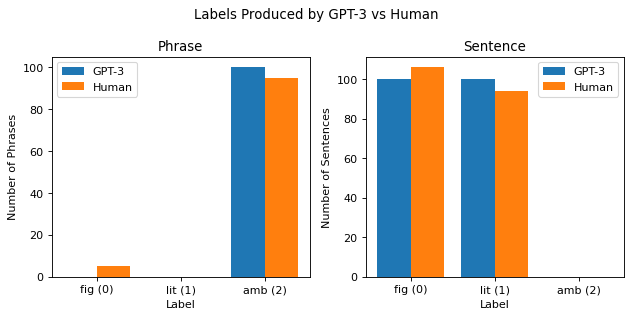

In [4]:
plt.figure(figsize=(8, 4), dpi=80)
plt.suptitle("Labels Produced by GPT-3 vs Human")

plt.subplot(1, 2, 1)
X = ['fig (0)', 'lit (1)', 'amb (2)']
Ygpt3 = [0, 0, len(df) / 2]
Zhuman = [
    len(df[df['phrase_label'] == 0]) / 2, 
    len(df[df['phrase_label'] == 1]) / 2,
    len(df[df['phrase_label'] == 2]) / 2,
]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Ygpt3, 0.4, label = 'GPT-3')
plt.bar(X_axis + 0.2, Zhuman, 0.4, label = 'Human')
plt.xticks(X_axis, X)
plt.xlabel("Label")
plt.ylabel("Number of Phrases")
plt.title("Phrase")
plt.legend()

plt.subplot(1, 2, 2)
X = ['fig (0)', 'lit (1)', 'amb (2)']
Ygpt3 = [len(df) / 2, len(df) / 2, 0]
Zhuman = [
    len(df[df['sentence_label'] == 0]), 
    len(df[df['sentence_label'] == 1]),
    len(df[df['sentence_label'] == 2]),
]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Ygpt3, 0.4, label = 'GPT-3')
plt.bar(X_axis + 0.2, Zhuman, 0.4, label = 'Human')
plt.xticks(X_axis, X)
plt.xlabel("Label")
plt.ylabel("Number of Sentences")
plt.title("Sentence")
plt.legend()
plt.tight_layout()

plt.show()

### Accuracy 

In [5]:
print(f"Phrase: {len(df[df['phrase_label'] == 2]) / len(df)}")
print(f"Sentence: {len(df[df['sentence_label'] == df['sentence_label_gpt3']]) / len(df)}")

Phrase: 0.95
Sentence: 0.97


## Evaluating Translation